<a href="https://colab.research.google.com/github/Jinukki/KJU/blob/master/Ch9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09-3 텐서플로로 순환 신경망을 만듭니다.
##### 이번에는 텐서플로에서 제공하는 여러 고급 기술을 활용하여 순환 신경망을 만들고 모델을 훈련시켜 보자.

---
> ### SimpleRNN 클래스로 순환 신경망 만들기
##### 텐서플로에서 가장 기본적인 순환층은 SimpleRNN(Recurrent Neural Networks) 클래스이다. 이번 절에서는 파이썬 클래스로 만들었던 것과 동일한 신경망을 SimpleRNN 클래스를 사용해 만들어 볼 것이다.

In [0]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

![15](https://user-images.githubusercontent.com/52277776/69008268-f4c6e100-098b-11ea-930f-3c414683e792.jpg)

##### SimpleRNN 클래스를 사용하는 방법은 Dense 클래스와 다르지 않다. 사용할 셀의 개수를 지정하고 Sequential 모델의 첫번째 층이므로 입력 차원을 지정한다. 타임 스텝의 길이가 100이고 원-핫 인코딩 크기가 100이므로 입력 크기는 (100,100)이다. 이진 분류이므로 1개의 유닛을 가진 Dense 층을 마지막에 추가한다. 모델을 완성하고 전체 구조를 출력해 보자.

In [0]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


##### model.summary() 메서드를 통해 출력된 결과에서 셀(SimpleRNN)의 파라미터 개수를 확인해 보자. 입력은 원-핫 인코딩된 100차원 벡터이고 셀 개수가 32개이므로 $W_{1x}$ 행렬 요소의 개수는 100x32가 될 것이다. 또한 $W_{1h}$ 행렬의 요소 개수도 32x32가 될 것이다. 마지막으로 셀마다 하나씩 총 32개의 절편이 있다. 따라서 순환층에 필요한 전체 파라미터 개수는 4,256개이다.

##### 이제 모델을 컴파일하고 IMDB 데이터 세트에 훈련시켜 보자. 가장 기본인 확률적 경사 하강법 'sgd'를 지정하고, 이진 분류이므로 손실 함수는 'binary_crossentropy'로 지정하였다.

In [0]:
from tensorflow.keras.datasets import imdb
(x_train_all, y_train_all), (x_test, y_test)=imdb.load_data(skip_top=20, num_words=100)

for i in range(len(x_train_all)):
  x_train_all[i]=[w for w in x_train_all[i] if w>2]

In [0]:
np.random.seed(42)
random_index=np.random.permutation(25000)

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

In [0]:
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [0]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [0]:
# metrics는 훈련과 시험이 진행되는 동안 모델에 의해 평가될 metric의 리스트
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 18s 878us/sample - loss: 0.6954 - accuracy: 0.5321 - val_loss: 0.6802 - val_accuracy: 0.5752
Epoch 2/20
20000/20000 [==============================] - 17s 827us/sample - loss: 0.6746 - accuracy: 0.5839 - val_loss: 0.6512 - val_accuracy: 0.6236
Epoch 3/20
20000/20000 [==============================] - 16s 819us/sample - loss: 0.6488 - accuracy: 0.6272 - val_loss: 0.7040 - val_accuracy: 0.5776
Epoch 4/20
20000/20000 [==============================] - 16s 812us/sample - loss: 0.6324 - accuracy: 0.6520 - val_loss: 0.6684 - val_accuracy: 0.5866
Epoch 5/20
20000/20000 [==============================] - 16s 824us/sample - loss: 0.6231 - accuracy: 0.6556 - val_loss: 0.6472 - val_accuracy: 0.6228
Epoch 6/20
20000/20000 [==============================] - 16s 818us/sample - loss: 0.6071 - accuracy: 0.6770 - val_loss: 0.5882 - val_accuracy: 0.6898
Epoch 7/20
20000/20000 [=====================

##### 훈련, 검증 세트에 대한 손실과 정확도를 그래프로 그려서 비교해 보자. 20번의 이포크 동안 손실과 정확도를 기록한 이 그래프에서 조금씩 과대 적합되는 현상이 보인다.

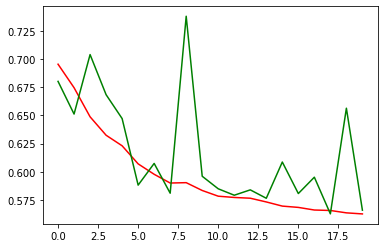

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.show()

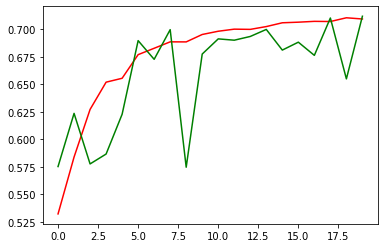

In [0]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.show()

#### 검증 세트에 대한 정확도를 평가해 보자.

In [0]:
# verbose는 keras 학습 단계에서 진행 상태를 어떻게 표시할 것인지 설정
# (0이면 표시 안함, 1이면 진행 막대 표시, 2이면 에폭당 1개 줄 표시)
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy) # 대략 70%의 정확도를 보임

0.712


---
> ### 임베딩층으로 순환 신경망 모델 성능 높이기
##### 앞에서 만들었던 순환 신경망의 가장 큰 단점 중 하나는 텍스트 데이터를 원-핫 인코딩으로 전처리한다는 것이다. 원-핫 인코딩을 사용하면 입력 데이터 크기와 사용할 수 있는 단어의 수가 제한된다는 문제가 있다. 또 원-핫 인코딩은 '단어 사이에는 관련이 전혀 없다'는 가정이 전제되어야 한다. 예를 들어 단어 boy와 girl의 관계는 밀접한 편이지만 원-핫 인코딩은 이런 단어 사이의 관계를 잘 표현하지 못한다.

![16](https://user-images.githubusercontent.com/52277776/69008269-f7293b00-098b-11ea-8e9d-e1a346105bcb.jpg)

##### 이런 문제를 해결하기 위해 고안된 것이 단어 임베딩(word embedding)이다. 단어 임베딩은 그림처럼 단어를 고정된 길이의 실수 벡터로 임베딩한다.

![17](https://user-images.githubusercontent.com/52277776/69008270-f98b9500-098b-11ea-9ea4-92857f79ed39.jpg)

##### 단어 임베딩은 모델을 훈련하면서 같이 훈련되므로 훈련이 진행될수록 단어의 연관 관계를 더 정확하게 찾을 수 있다.

In [0]:
from tensorflow.keras.layers import Embedding

##### 이번에는 IMDB 데이터에서 1000개의 단어를 사용한다. 단어 임베딩은 단어를 표현하는 벡터의 크기를 임의로 지정할 수 있으므로 사용하는 단어의 개수에 영향을 받지 않는다.

In [0]:
(x_train_all, y_train_all), (x_test, y_test)=imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i]=[w for w in x_train_all[i] if w>2]

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

In [0]:
maxlen=100  # 타임 스텝의 크기가 100인 시퀀스 데이터 만들기
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

##### 원-핫 인코딩된 벡터의 길이는 100이었지만 단어 임베딩에서는 길이를 32로 줄일 것이다. Embedding 클래스에 입력한 매개변수는 단어 개수와 출력 길이이다. 또한 SimpleRNN의 셀 개수를 8개로 크게 줄일 것이다. 임베딩층의 성능이 뛰어나기 때문에 셀 개수가 적어도 만족할 만한 성능을 얻을 수 있을 것이다.

In [0]:
model_ebd = Sequential()
model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


##### 훈련 과정은 이전과 동일하다. 여기에서는 08장에서 사용하였던 Adam 최적화 알고리즘을 사용하고 10번의 에포크만 훈련한다.

In [0]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 828us/sample - loss: 0.5616 - accuracy: 0.6949 - val_loss: 0.4596 - val_accuracy: 0.7932
Epoch 2/10
20000/20000 [==============================] - 15s 752us/sample - loss: 0.4082 - accuracy: 0.8260 - val_loss: 0.4283 - val_accuracy: 0.8114
Epoch 3/10
20000/20000 [==============================] - 15s 763us/sample - loss: 0.3758 - accuracy: 0.8418 - val_loss: 0.4300 - val_accuracy: 0.7996
Epoch 4/10
20000/20000 [==============================] - 15s 761us/sample - loss: 0.3598 - accuracy: 0.8514 - val_loss: 0.4231 - val_accuracy: 0.8114
Epoch 5/10
20000/20000 [==============================] - 15s 759us/sample - loss: 0.3304 - accuracy: 0.8643 - val_loss: 0.4536 - val_accuracy: 0.7834
Epoch 6/10
20000/20000 [==============================] - 14s 719us/sample - loss: 0.3046 - accuracy: 0.8760 - val_loss: 0.4391 - val_accuracy: 0.8190
Epoch 7/10
20000/20000 [=====================

##### 손실과 정확도를 그래프로 그려보자.<br> 훈련 초기에 이미 성능이 향상되어 에포크가 진행됨에 따라 다소 과대적합되는 모습을 보인다.

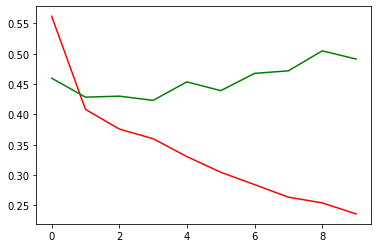

In [0]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.show()

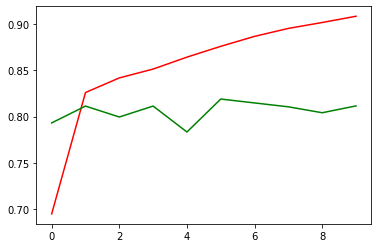

In [0]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.show()

##### 검증 세트의 정확도를 평가해 보자.

In [0]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy) # 정확도 향상

0.8116


##### 원-핫 인코딩을 사용하지 않아 메모리 사용이 절감되었고 적은 셀 개수에서도 더 높은 성능을 나타내었다. 이렇게 단어 임베딩은 효율적이고 성능이 뛰어나기 때문에 순환 신경망에서 텍스트 처리를 할 때 임베딩 층이 기본으로 사용된다.
<br>

##### 지금까지 텐서플로를 이용하여 순환 신경망을 구현하고 모델을 훈련시켜보았다. SimpleRNN 클래스와 임베딩 층을 사용하니 텍스트 데이터를 조금 더 효율적으로 처리할 수 있었다. 마지막으로 LSTM 순환 신경망을 통해 텍스트를 더 잘 분류하는 모델을 만들어보자.